In [1]:
pip install pandas scikit-learn matplotlib

Note: you may need to restart the kernel to use updated packages.


In [36]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import tree

In [40]:
df_cus = pd.read_csv("dataset_fashion_store_customers.csv")
df_cus.head(5)

,customer_id,country,age_range,signup_date
0,1,France,56-65,2025-04-24
1,2,France,36-45,2025-02-24
2,3,Netherlands,46-55,2024-04-12
3,4,Italy,36-45,2025-03-11
4,5,Spain,26-35,2025-04-26


In [41]:
df_sal = pd.read_csv("dataset_fashion_store_sales.csv")
df_sal.head(5)

,sale_id,channel,discounted,total_amount,sale_date,customer_id,country
0,10,E-commerce,0,299.70,2025-05-21,195,France
1,100,App Mobile,0,681.05,2025-04-21,518,Germany
2,1000,E-commerce,0,324.50,2025-05-20,439,Germany
3,1001,E-commerce,0,287.85,2025-04-05,349,Germany
4,1003,App Mobile,0,430.64,2025-06-06,727,Portugal


In [42]:
campaign = df_sal['discounted'].value_counts()
campaign

discounted
0    816
1     89
Name: count, dtype: int64

In [43]:
df_sal.rename(columns={'discounted':'risky_client'},
inplace=True)

In [54]:
merged_df = pd.merge(df_sal, df_cus, on='customer_id', how='inner')
merged_df.head(5)

,sale_id,channel,risky_client,total_amount,sale_date,customer_id,country,age_range,signup_date
0,10,E-commerce,0,299.70,2025-05-21,195,France,56-65,2025-02-28
1,100,App Mobile,0,681.05,2025-04-21,518,Germany,46-55,2025-03-29
2,1000,E-commerce,0,324.50,2025-05-20,439,Germany,36-45,2025-05-11
3,1001,E-commerce,0,287.85,2025-04-05,349,Germany,26-35,2025-03-20
4,1003,App Mobile,0,430.64,2025-06-06,727,Portugal,26-35,2025-03-09


In [55]:
df = merged_df

In [57]:
df.dtypes

sale_id           int64
channel          object
risky_client      int64
total_amount    float64
sale_date        object
customer_id       int64
country          object
age_range        object
signup_date      object
dtype: object

In [58]:
# Convert to datetime
df['sale_date'] = pd.to_datetime(df['sale_date'])
df['signup_date'] = pd.to_datetime(df['signup_date'])

# Subtract dates
df['days_to_sale'] = (df['sale_date'] - df['signup_date']).dt.days
df

,sale_id,channel,risky_client,total_amount,sale_date,customer_id,country,age_range,signup_date,days_to_sale
0,10,E-commerce,0,299.70,2025-05-21,195,France,56-65,2025-02-28,82
1,100,App Mobile,0,681.05,2025-04-21,518,Germany,46-55,2025-03-29,23
2,1000,E-commerce,0,324.50,2025-05-20,439,Germany,36-45,2025-05-11,9
3,1001,E-commerce,0,287.85,2025-04-05,349,Germany,26-35,2025-03-20,16
4,1003,App Mobile,0,430.64,2025-06-06,727,Portugal,26-35,2025-03-09,89
...,...,...,...,...,...,...,...,...,...,...
900,992,App Mobile,1,214.08,2025-05-13,375,Germany,36-45,2025-02-28,74
901,993,E-commerce,0,311.37,2025-04-21,99,Spain,36-45,2025-03-17,35
902,994,App Mobile,1,477.09,2025-05-15,798,Portugal,46-55,2025-03-14,62
903,995,E-commerce,0,489.02,2025-05-19,565,Spain,46-55,2025-05-08,11


In [59]:
df.dtypes

sale_id                  int64
channel                 object
risky_client             int64
total_amount           float64
sale_date       datetime64[ns]
customer_id              int64
country                 object
age_range               object
signup_date     datetime64[ns]
days_to_sale             int64
dtype: object

In [64]:
# Function to calculate average age from range
def average_age(age_range):
    start, end = map(int, age_range.split('-'))
    return (start + end) / 2

# Apply the function
df['average_age'] = df['age_range'].apply(average_age)
df

,sale_id,channel,risky_client,total_amount,sale_date,customer_id,country,age_range,signup_date,days_to_sale,average_age
0,10,E-commerce,0,299.70,2025-05-21,195,France,56-65,2025-02-28,82,60.5
1,100,App Mobile,0,681.05,2025-04-21,518,Germany,46-55,2025-03-29,23,50.5
2,1000,E-commerce,0,324.50,2025-05-20,439,Germany,36-45,2025-05-11,9,40.5
3,1001,E-commerce,0,287.85,2025-04-05,349,Germany,26-35,2025-03-20,16,30.5
4,1003,App Mobile,0,430.64,2025-06-06,727,Portugal,26-35,2025-03-09,89,30.5
...,...,...,...,...,...,...,...,...,...,...,...
900,992,App Mobile,1,214.08,2025-05-13,375,Germany,36-45,2025-02-28,74,40.5
901,993,E-commerce,0,311.37,2025-04-21,99,Spain,36-45,2025-03-17,35,40.5
902,994,App Mobile,1,477.09,2025-05-15,798,Portugal,46-55,2025-03-14,62,50.5
903,995,E-commerce,0,489.02,2025-05-19,565,Spain,46-55,2025-05-08,11,50.5


In [65]:
df = df.drop(columns=['sale_id', 'channel','sale_date', 'customer_id', 'country', 'age_range', 'signup_date'])
df

,risky_client,total_amount,days_to_sale,average_age
0,0,299.70,82,60.5
1,0,681.05,23,50.5
2,0,324.50,9,40.5
3,0,287.85,16,30.5
4,0,430.64,89,30.5
...,...,...,...,...
900,1,214.08,74,40.5
901,0,311.37,35,40.5
902,1,477.09,62,50.5
903,0,489.02,11,50.5


In [66]:
df.dtypes

risky_client      int64
total_amount    float64
days_to_sale      int64
average_age     float64
dtype: object

In [67]:
# Features (X) and Target (y)
X = df[['total_amount', 'days_to_sale','average_age']]  # Features
y = df['risky_client']                           # Target variable (0 = Fail, 1 = Pass)

# Split data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shape of the training and testing sets
print(f"Training data: {X_train.shape}, {y_train.shape}")
print(f"Testing data: {X_test.shape}, {y_test.shape}")

Training data: (724, 3), (724,)
Testing data: (181, 3), (181,)


In [68]:
# Initialize the Decision Tree Classifier
model = DecisionTreeClassifier(random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)

# Display the model's parameters
print(f"Tree depth: {model.get_depth()}")
print(f"Number of leaves: {model.get_n_leaves()}")

Tree depth: 17
Number of leaves: 123


In [69]:
# Make predictions on the testing set
y_pred = model.predict(X_test)

# Display the predictions
print("Predicted Outcomes (Churn/Stay):", y_pred)
print("Actual Outcomes:", y_test.values)

Predicted Outcomes (Churn/Stay): [0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
Actual Outcomes: [0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]


In [70]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Generate classification report
class_report = classification_report(y_test, y_pred)

# Display evaluation metrics
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.850828729281768
Confusion Matrix:
[[151  16]
 [ 11   3]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.90      0.92       167
           1       0.16      0.21      0.18        14

    accuracy                           0.85       181
   macro avg       0.54      0.56      0.55       181
weighted avg       0.87      0.85      0.86       181



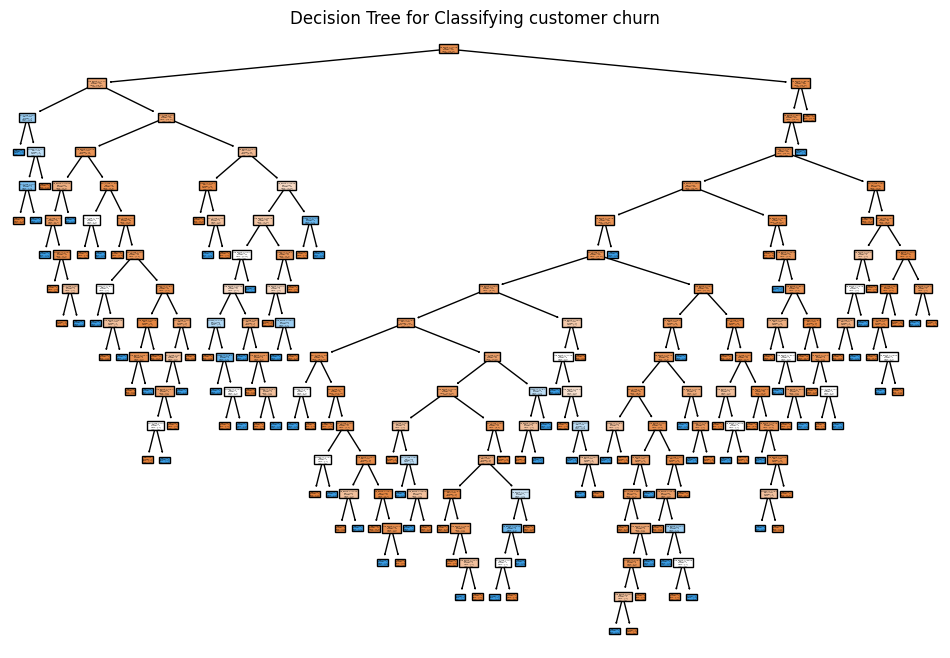

In [75]:
# Visualize the decision tree
plt.figure(figsize=(12,8))
tree.plot_tree(model, feature_names=['total_amount', 'days_to_sale','average_age'], class_names=['Stay', 'Churn'], filled=True)
plt.title('Decision Tree for Classifying customer churn')
plt.show()